In [98]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr

from sklearn.decomposition import PCA

In [2]:
fp = os.path.join('data', 'ucsdteamstats.csv')
team_stats = pd.read_csv(fp)
team_stats

,Season,Player,GP,MP,PTS,PPG,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB/G,AST,AST/G,STL,BLK,CONF_PCT,OVERALL_PCT
0,2019-2020,"Roberts,Tyrell",31,997,594,19.16,205,427,0.48,111,...,0.89,11,94,3.39,97,3.13,48,3,0.955,0.968
1,2019-2020,"Oshita,Christian",31,981,547,17.65,191,385,0.50,98,...,0.68,40,164,6.58,53,1.71,18,5,0.955,0.968
2,2019-2020,"Hansen,Chris",16,323,205,12.81,72,132,0.55,24,...,0.95,28,61,5.56,14,0.88,10,10,0.955,0.968
3,2019-2020,"Everman,Scott",31,698,304,9.81,115,222,0.52,40,...,0.79,28,50,2.52,38,1.23,19,13,0.955,0.968
4,2019-2020,"Hadley,Gabe",31,569,270,8.71,95,206,0.46,63,...,0.81,8,44,1.68,33,1.06,18,2,0.955,0.968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2015-2016,"BUAKU, George",29,608,125,4.31,40,105,0.38,14,...,0.63,7,61,2.34,40,1.38,21,6,0.750,0.750
63,2015-2016,"COX, Koree",31,392,125,4.03,42,105,0.40,13,...,0.68,7,60,2.16,20,0.65,11,0,0.750,0.750
64,2015-2016,"BALLESTERO, Anthony",24,275,92,3.83,27,79,0.34,27,...,0.85,9,10,0.79,15,0.63,7,0,0.750,0.750
65,2015-2016,"FRASER, Kenny",32,353,49,1.53,22,59,0.37,0,...,0.56,18,41,1.84,8,0.25,2,5,0.750,0.750


In [20]:
team_stats.columns

Index(['Season', 'Player', 'GP', 'MP', 'PTS', 'PPG', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB/G',
       'AST', 'AST/G', 'STL', 'BLK', 'CONF_PCT', 'OVERALL_PCT'],
      dtype='object')

In [51]:
team_avg_stats = team_stats[['Season', 'Player', 'MP', 'PPG', 'FG%', '3P%', 'FT%', 'REB/G', 'AST/G', 'STL', 'BLK', 
                          'CONF_PCT', 'OVERALL_PCT']]
team_avg_stats = team_avg_stats.rename(columns={'FG%': 'FG_PCT', '3P%': 'threes', 'FT%': 'FT_PCT', 
                                                "REB/G": "REB_G", "AST/G": "AST_G"})
team_avg_stats

,Season,Player,MP,PPG,FG_PCT,threes,FT_PCT,REB_G,AST_G,STL,BLK,CONF_PCT,OVERALL_PCT
0,2019-2020,"Roberts,Tyrell",997,19.16,0.48,0.46,0.89,3.39,3.13,48,3,0.955,0.968
1,2019-2020,"Oshita,Christian",981,17.65,0.50,0.42,0.68,6.58,1.71,18,5,0.955,0.968
2,2019-2020,"Hansen,Chris",323,12.81,0.55,0.39,0.95,5.56,0.88,10,10,0.955,0.968
3,2019-2020,"Everman,Scott",698,9.81,0.52,0.35,0.79,2.52,1.23,19,13,0.955,0.968
4,2019-2020,"Hadley,Gabe",569,8.71,0.46,0.40,0.81,1.68,1.06,18,2,0.955,0.968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2015-2016,"BUAKU, George",608,4.31,0.38,0.30,0.63,2.34,1.38,21,6,0.750,0.750
63,2015-2016,"COX, Koree",392,4.03,0.40,0.52,0.68,2.16,0.65,11,0,0.750,0.750
64,2015-2016,"BALLESTERO, Anthony",275,3.83,0.34,0.34,0.85,0.79,0.63,7,0,0.750,0.750
65,2015-2016,"FRASER, Kenny",353,1.53,0.37,0.00,0.56,1.84,0.25,2,5,0.750,0.750


## Regression

Text(0, 0.5, 'OVERALL_PCT')

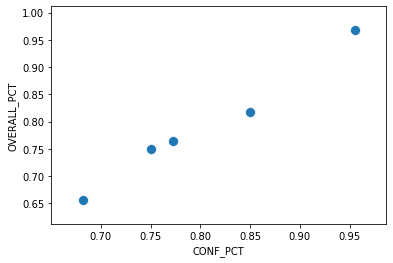

In [11]:
sns.scatterplot(x='CONF_PCT', y='OVERALL_PCT', data=team_avg_stats, s=100)
plt.xlabel('CONF_PCT')
plt.ylabel('OVERALL_PCT')

In [52]:
df_cols = "OVERALL_PCT ~ MP"

for i in range(3, 11):
    df_cols += " + "
    df_cols += team_avg_stats.columns[i]
    
df_cols

'OVERALL_PCT ~ MP + PPG + FG_PCT + threes + FT_PCT + REB_G + AST_G + STL + BLK'

In [53]:
outcome, predictors = patsy.dmatrices(df_cols, team_avg_stats)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            OVERALL_PCT   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.7882
Date:                Tue, 01 Jun 2021   Prob (F-statistic):              0.628
Time:                        23:44:53   Log-Likelihood:                 58.418
No. Observations:                  67   AIC:                            -96.84
Df Residuals:                      57   BIC:                            -74.79
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7489      0.065     11.448      0.000       0.618       0.880
MP            -0.0002   9.53e-05     -2.016      0.049      -0.000   -1.26e-06
PPG            0.0027      0.006      0.459      0.648      -0.009       0.014
FG_PCT         0.0825      0.166      0.496      0.622      -0.251       0.416
threes        -0.0807      0.121     -0.666      0.508      -0.323       0.162
FT_PCT         0.1060      0.076      1.404      0.166      -0.045       0.257
REB_G          0.0010      0.018      0.053      0.958      -0.036       0.038
AST_G          0.0177      0.021      0.854      0.397      -0.024       0.059
STL            0.0016      0.002      0.716      0.477      -0.003       0.006
BLK           -0.0006      0.003     -0.178      0.860      -0.007       0.006
==============================================================================
Omnibus:                        3.145   Durbin-Watson:                   0.405
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                1.997
Skew:                           0.199   Prob(JB):                        0.368
Kurtosis:                       2.254   Cond. No.                     7.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
outcome, predictors = patsy.dmatrices('OVERALL_PCT ~ FT_PCT', team_avg_stats)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            OVERALL_PCT   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8848
Date:                Tue, 01 Jun 2021   Prob (F-statistic):              0.350
Time:                        23:50:12   Log-Likelihood:                 54.941
No. Observations:                  67   AIC:                            -105.9
Df Residuals:                      65   BIC:                            -101.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7628      0.042     18.330      0.000       0.680       0.846
FT_PCT         0.0551      0.059      0.941      0.350      -0.062       0.172
==============================================================================
Omnibus:                        7.678   Durbin-Watson:                   0.145
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                4.529
Skew:                           0.454   Prob(JB):                        0.104
Kurtosis:                       2.107   Cond. No.                         6.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
outcome, predictors = patsy.dmatrices("OVERALL_PCT ~ threes", team_avg_stats)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            OVERALL_PCT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                 0.0009509
Date:                Tue, 01 Jun 2021   Prob (F-statistic):              0.975
Time:                        23:50:36   Log-Likelihood:                 54.489
No. Observations:                  67   AIC:                            -105.0
Df Residuals:                      65   BIC:                            -100.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8008      0.031     25.556      0.000       0.738       0.863
threes        -0.0028      0.090     -0.031      0.975      -0.182       0.177
==============================================================================
Omnibus:                        8.086   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                4.379
Skew:                           0.423   Prob(JB):                        0.112
Kurtosis:                       2.076   Cond. No.                         7.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

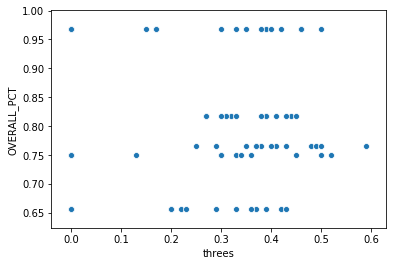

In [63]:
sns.scatterplot(team_avg_stats['threes'], team_avg_stats['OVERALL_PCT'])


In [67]:
pearsonr(team_avg_stats['threes'].to_list(), team_avg_stats['OVERALL_PCT'].to_list())[0]

-0.00382484659978723

Pearson's r is about 0, which means there isn't a correlation between 3P% and Overall_Pct

## PCA

In [128]:
stats = ["PPG", "FG_PCT", "threes", "FT_PCT", "REB_G", "AST_G", "STL", "BLK"]

transposed = team_avg_stats.loc[:, stats].transpose()
transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
PPG,19.16,17.65,12.81,9.81,8.71,8.61,6.65,2.10,1.86,1.41,...,10.31,9.30,7.63,7.00,4.76,4.31,4.03,3.83,1.53,0.95
FG_PCT,0.48,0.50,0.55,0.52,0.46,0.66,0.51,0.42,0.45,0.41,...,0.59,0.37,0.40,0.44,0.57,0.38,0.40,0.34,0.37,0.47
threes,0.46,0.42,0.39,0.35,0.40,0.30,0.46,0.38,0.15,0.33,...,0.13,0.36,0.33,0.50,0.00,0.30,0.52,0.34,0.00,0.00
FT_PCT,0.89,0.68,0.95,0.79,0.81,0.72,0.67,0.82,0.77,0.62,...,0.76,0.86,0.77,0.71,0.46,0.63,0.68,0.85,0.56,0.38
REB_G,3.39,6.58,5.56,2.52,1.68,5.94,3.61,0.75,0.93,0.82,...,4.50,3.48,3.66,1.50,4.71,2.34,2.16,0.79,1.84,1.80


In [130]:
pca = PCA(n_components=8)
success_pca_fit = pca.fit(transposed)
success_PCs = pca.fit_transform(transposed)

Text(0, 0.5, 'variance explained')

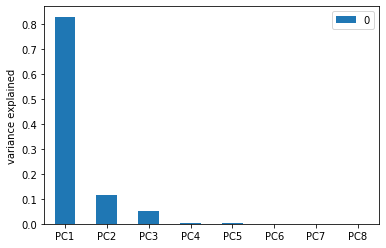

In [131]:
var_exp = pd.DataFrame(success_pca_fit.explained_variance_ratio_,
                      ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
var_exp.plot.bar(rot=0)
plt.ylabel('variance explained')

In [139]:
print(success_pca_fit.explained_variance_ratio_)

[8.28009583e-01 1.15880364e-01 5.26378478e-02 2.07311679e-03
 1.23922383e-03 1.33566000e-04 2.62986679e-05 7.51895368e-33]


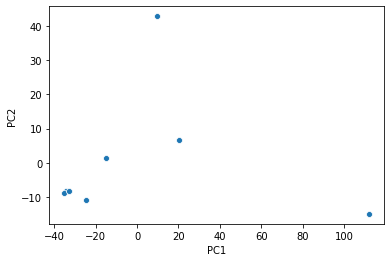

In [133]:
success_out = pd.DataFrame(success_PCs, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'],
                          index = transposed.index)
sns.scatterplot(x = 'PC1', y = 'PC2', data = success_out)

In [134]:
success_out[success_out['PC1'] > 0]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
PPG,20.037835,6.723366,29.377324,-1.462975,0.049948,-0.030711,0.011960,4.435705e-15
STL,111.910870,-14.833190,-7.995263,-0.009697,-0.307886,-0.017370,-0.001443,4.435705e-15
BLK,9.814376,42.734419,-10.518760,-0.745197,0.297847,0.002524,-0.001081,4.435705e-15


## Are these the most important variables?

In [173]:
pca_cols = ['PTS', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB','AST', 'STL', 'BLK']

transposed = team_stats.loc[:, pca_cols].transpose()
transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
PTS,594,547,205,304,270,267,206,42,52,31,...,330,251,244,14,100,125,125,92,49,19
FGM,205,191,72,115,95,106,69,10,20,9,...,132,78,82,4,42,40,42,27,22,8
FGA,427,385,132,222,206,160,134,24,44,22,...,222,211,206,9,74,105,105,79,59,17
3PM,111,98,24,40,63,12,24,8,2,5,...,1,63,16,1,0,14,13,27,0,0
3PA,240,232,61,115,158,40,52,21,13,15,...,8,176,49,2,0,47,25,79,10,3


In [174]:
pca = PCA(n_components=12)
success_pca_fit = pca.fit(transposed)
success_PCs = pca.fit_transform(transposed)

Text(0, 0.5, 'variance explained')

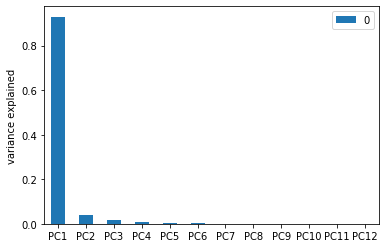

In [175]:
var_exp = pd.DataFrame(success_pca_fit.explained_variance_ratio_,
                      ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                       'PC10', 'PC11', 'PC12'])
var_exp.plot.bar(rot=0)
plt.ylabel('variance explained')

In [176]:
print(success_pca_fit.explained_variance_ratio_)

[9.29632607e-01 4.05765620e-02 1.49460085e-02 6.33701644e-03
 3.70716573e-03 3.10137254e-03 8.32976818e-04 3.83895855e-04
 2.57696745e-04 1.51896578e-04 7.28021415e-05 3.69814717e-33]


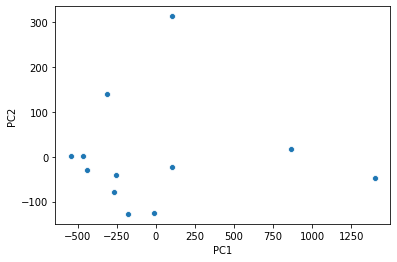

In [177]:
success_out = pd.DataFrame(success_PCs,
                           columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
                                      'PC10', 'PC11', 'PC12'],
                          index = transposed.index)
sns.scatterplot(x = 'PC1', y = 'PC2', data = success_out)

In [181]:
success_out[success_out['PC1'] > 0]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
PTS,1401.995045,-47.818387,-11.943720,-19.915440,-22.684891,-55.385951,-3.714265,-5.173280,2.429396,1.065974,-3.446621,3.503311e-14
FGM,102.347088,-22.638025,-40.845606,-2.147386,39.254605,-28.457001,5.123557,12.661094,-9.392362,3.750255,11.925829,3.503311e-14
FGA,863.100756,16.960709,7.482491,4.444940,58.608653,70.475540,10.336329,3.270656,2.717812,-2.791566,-2.276315,3.503311e-14
3PA,100.975924,313.129641,10.706991,12.234858,-33.532656,16.558233,-7.764706,-11.981099,-1.141533,4.280454,4.076226,3.503311e-14


## Similar to what the coach said, fast paced offense with lots of 3s?

run regression again with the 4 variables above?